<h1><b>Pipelining (Binary Classification)</b></h1>

<b>In machine learning, pipelining refers to the process of chaining together multiple data processing steps into a single workflow or pipeline. These steps can include data preprocessing, feature extraction, feature selection, and model training. The purpose of pipelining is to streamline the workflow, making it easier to organize and manage complex processes, especially when dealing with large datasets.</b>

<h3 style="color: blue;"><b>Loading Libraries</b></h3>

In [1]:
# Data loading and manipulating libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Train Test Split
from sklearn.model_selection import train_test_split

# Feature Engineering-Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Feature Selection and Feature Reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Oversampling the lower target class
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

#Pipeline imports
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

<h3 style="color: blue;"><b>Reading The Dataset</b></h3>

In [3]:
df=pd.read_csv("/content/clean_data.csv")
df.rename({'status':'isClosed'}, axis=1, inplace=True)
df['isClosed'].replace({'operating':0,'ipo':0,'acquired':1,'closed':1}, inplace=True)
df.head()

,category_code,isClosed,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
0,web,1,2007,USA,2008,2008,1,5000000.0,2008,2012,3,14,37.386052,-122.083851,4015.0
1,enterprise,0,2004,USA,2011,2011,1,1500000.0,2010,2010,1,8,47.610150,-122.201516,6205.0
2,web,0,2006,USA,2007,2007,1,2500000.0,2010,2012,2,7,37.774929,-122.419415,5475.0
3,ecommerce,0,2004,USA,2011,2011,1,3800000.0,2012,2012,1,9,47.610150,-122.201516,6205.0
4,games_video,0,2011,USA,2011,2011,1,40000.0,2012,2012,1,5,37.774929,-122.419415,3650.0


In [4]:
#due to multicollinearity
df.drop(['first_funding_at','first_milestone_at'], axis=1, inplace=True)

<h3 style="color: blue;"><b>Train-Test Splitting</b></h2>

In [5]:
X = df.drop('isClosed', axis=1) #independent variable
y = df['isClosed'] #target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("===============================================================")
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (7064, 12) (7064,)
Testing set shape: (1766, 12) (1766,)


<h3 style="color: blue;"><b>Creation of Columns Transformer and Other Transformer</b></h2>

In [6]:
categorical_columns = ['country_code', 'category_code']  # List of your categorical column names
numeric_columns = ['founded_at', 'last_funding_at', 'funding_rounds',
                   'funding_total_usd', 'last_milestone_at', 'milestones',
                   'relationships', 'lat', 'lng', 'active_days']  # List of your numeric column names


In [7]:
#scaling
trf1 = ColumnTransformer([
    ('StandardScaler', StandardScaler(), numeric_columns)
])


In [8]:
#Categorical encoding
trf2= ColumnTransformer([
    ('OneHotEncoded', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)  # One-hot encode categorical columns
], remainder='passthrough')


In [9]:
#Synthetic Minority Over-sampling Technique
trf2 = SMOTE(random_state=0)

In [10]:
#Mutual Information Score
trf3 =  SelectKBest(mutual_info_classif, k='all')

In [11]:
#Principal Component Analysis
trf4 = PCA()

<h3 style="color: blue;"><b>Models</b></h2>

In [12]:
classifier_rf = RandomForestClassifier(random_state=42)
classifier_logreg = LogisticRegression()
classifier_nb = GaussianNB()

<h3 style="color: blue;"><b>Creation of Pipeline for the Models</b></h2>

In [13]:
# Create a pipeline for RandomForestClassifier
pipeline_rf = ImbPipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('classifier', classifier_rf),
])

# Create a pipeline for Logistic Regression
pipeline_logreg = ImbPipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('classifier', classifier_logreg),
])

# Create a pipeline for Naive Bayes
pipeline_nb = ImbPipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('classifier', classifier_nb),
])


<h3 style="color: blue;"><b>Fit and evaluating the RandomForestClassifier pipeline</b></h2>

RandomForestClassifier Metrics:
Train Accuracy=0.9479048697621744
Test Accuracy=0.9479048697621744
Precision=0.8114754098360656
Recall=0.8114754098360656
F1 Score=0.8114754098360656


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1522
           1       0.81      0.81      0.81       244

    accuracy                           0.95      1766
   macro avg       0.89      0.89      0.89      1766
weighted avg       0.95      0.95      0.95      1766



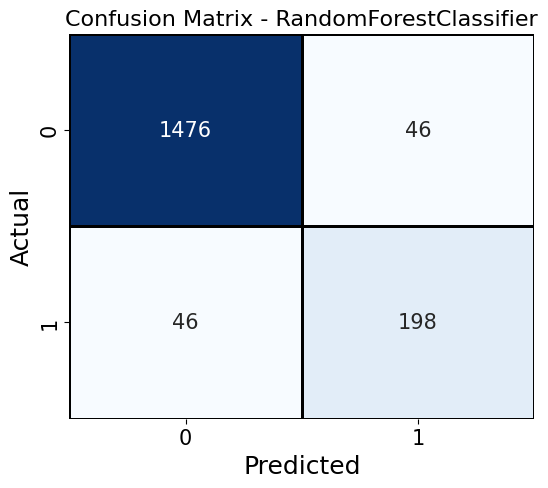

In [14]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("==================================================================")
print("RandomForestClassifier Metrics:")
print("Train Accuracy={}".format(accuracy_rf))
print("Test Accuracy={}".format(accuracy_rf))
print("Precision={}".format(precision_rf))
print("Recall={}".format(recall_rf))
print("F1 Score={}".format(f1_rf))
print("==================================================================")
print("\n")
print("Classification Report for RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))
print("==================================================================")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, annot_kws={"fontsize": 15}, linewidths=2,
            linecolor='black', cmap='Blues', cbar=False, fmt='g')
plt.title("Confusion Matrix - RandomForestClassifier", fontsize=16)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<h3 style="color: blue;"><b>Fit and evaluating the Logistic Regression pipeline</b></h2>

Logistic Regression Metrics:
Train Accuracy=0.9229898074745186
Test Accuracy=0.9229898074745186
Precision=0.68
Recall=0.8360655737704918
F1 Score=0.7500000000000001
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1522
           1       0.68      0.84      0.75       244

    accuracy                           0.92      1766
   macro avg       0.83      0.89      0.85      1766
weighted avg       0.93      0.92      0.93      1766





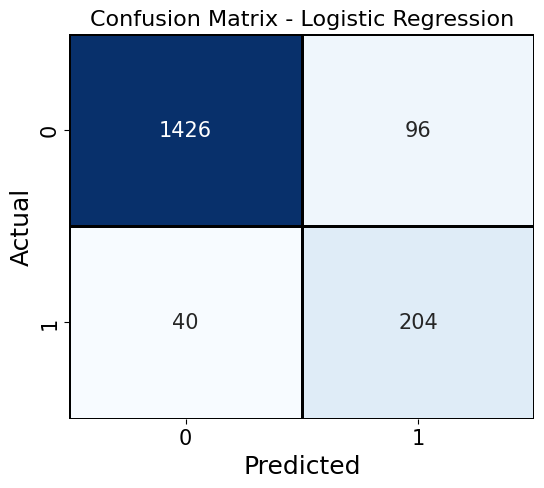

In [15]:
pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = pipeline_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
print("==================================================================")
print("Logistic Regression Metrics:")
print("Train Accuracy={}".format(accuracy_logreg))
print("Test Accuracy={}".format(accuracy_logreg))
print("Precision={}".format(precision_logreg))
print("Recall={}".format(recall_logreg))
print("F1 Score={}".format(f1_logreg))
print("==================================================================")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("\n")
print("==================================================================")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, annot_kws={"fontsize": 15}, linewidths=2,
            linecolor='black', cmap='Blues', cbar=False, fmt='g')
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<h3 style="color: blue;"><b>Fit and evaluating the Naive Bayes pipeline</b></h2>

Naive Bayes Metrics:
Train Accuracy=0.8731596828992072
Test Accuracy=0.8731596828992072
Precision=0.5268817204301075
Recall=0.8032786885245902
F1 Score=0.6363636363636364
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1522
           1       0.53      0.80      0.64       244

    accuracy                           0.87      1766
   macro avg       0.75      0.84      0.78      1766
weighted avg       0.90      0.87      0.88      1766





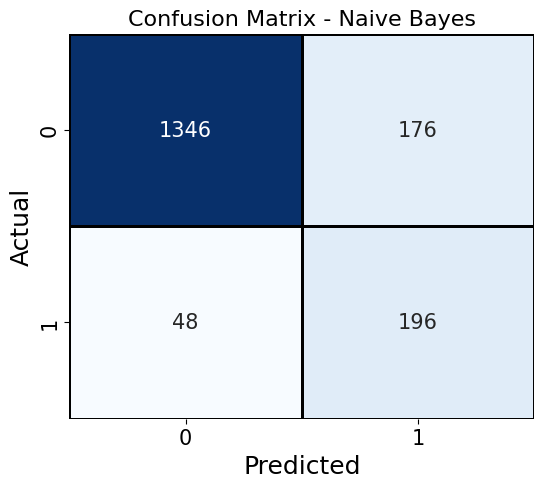

In [16]:
pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("==================================================================")
print("Naive Bayes Metrics:")
print("Train Accuracy={}".format(accuracy_nb))
print("Test Accuracy={}".format(accuracy_nb))
print("Precision={}".format(precision_nb))
print("Recall={}".format(recall_nb))
print("F1 Score={}".format(f1_nb))
print("==================================================================")
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("\n")
print("==================================================================")
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, annot_kws={"fontsize": 15}, linewidths=2,
            linecolor='black', cmap='Blues', cbar=False, fmt='g')
plt.title("Confusion Matrix - Naive Bayes", fontsize=16)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print("==================================================================")


### Dump the random forest model to create web application for predicting acquisition status.

In [18]:
from joblib import dump, load

# Save the model using joblib
dump(pipeline_rf, '/content/model/pipeline_rf.joblib')

['/content/model/pipeline_rf.joblib']